## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones). 

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [204]:
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

warnings.filterwarnings("ignore")

In [205]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [206]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [207]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [208]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [209]:
display(train.isnull().sum())
display(test.isnull().sum())
# все нули - значит пропусков в данных нет

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [210]:
display(train.describe())
display(test.describe())
# Если объединить трейн и тест, то все данные будут принадлежать от -1 до 1. То есть данные уже нормированы
# subject в этих данных ничего не значит, так как это просто номер испытуемого (категориальный признак)
# медиана в данной таблице это 50% перцентиль
# Большинство статистических данных в основном имеют отрицательные значения (судя по перценталям)
# Кроме tGravityAcc-min()-X, который имеет в основном положительные значения
# и angle(Y,gravityMean), angle(Z,gravityMean) и fBodyAcc-skewness()-X - они имеют более разнообразные значения
# В тестовых данных многие признаки практически не имеют положительных значений (tBodyGyroJerk-mad()-X и fBodyAcc-bandsEnergy()-1,8.2)
# Минимум (третий столбец) в данных меньше максимума, значит, скорее всего, при определении минимума/максимума этот параметр инвертируется

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [211]:
unique_activities = train.Activity.unique()  # все уникальные значения

# Создаём словарь вида {Activity: activity amount}
train_activity_to_amount = {}
for i in unique_activities:
    train_activity_to_amount[i] = (train.Activity == i).sum()
print("train:")
display(train_activity_to_amount)

test_activity_to_amount = {}
for i in unique_activities:
    test_activity_to_amount[i] = (test.Activity == i).sum()
print("test:")
display(test_activity_to_amount)

# Соединим два словаря
total_activity_to_amount = {}
for i in unique_activities:
    total_activity_to_amount[i] = train_activity_to_amount[i] + test_activity_to_amount[i]
print("total:")
display(total_activity_to_amount)

# разница между самой крупной и самой мелкой категорией в процентах
# в данном случае разница чуть меньше 30 процентов, так что можем считать, что данные сбалансированы!
print(round((1 - min(total_activity_to_amount.values()) / max(total_activity_to_amount.values())) * 100), "%")

train:


{'STANDING': 1374,
 'SITTING': 1286,
 'LAYING': 1407,
 'WALKING': 1226,
 'WALKING_DOWNSTAIRS': 986,
 'WALKING_UPSTAIRS': 1073}

test:


{'STANDING': 532,
 'SITTING': 491,
 'LAYING': 537,
 'WALKING': 496,
 'WALKING_DOWNSTAIRS': 420,
 'WALKING_UPSTAIRS': 471}

total:


{'STANDING': 1906,
 'SITTING': 1777,
 'LAYING': 1944,
 'WALKING': 1722,
 'WALKING_DOWNSTAIRS': 1406,
 'WALKING_UPSTAIRS': 1544}

28 %


### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

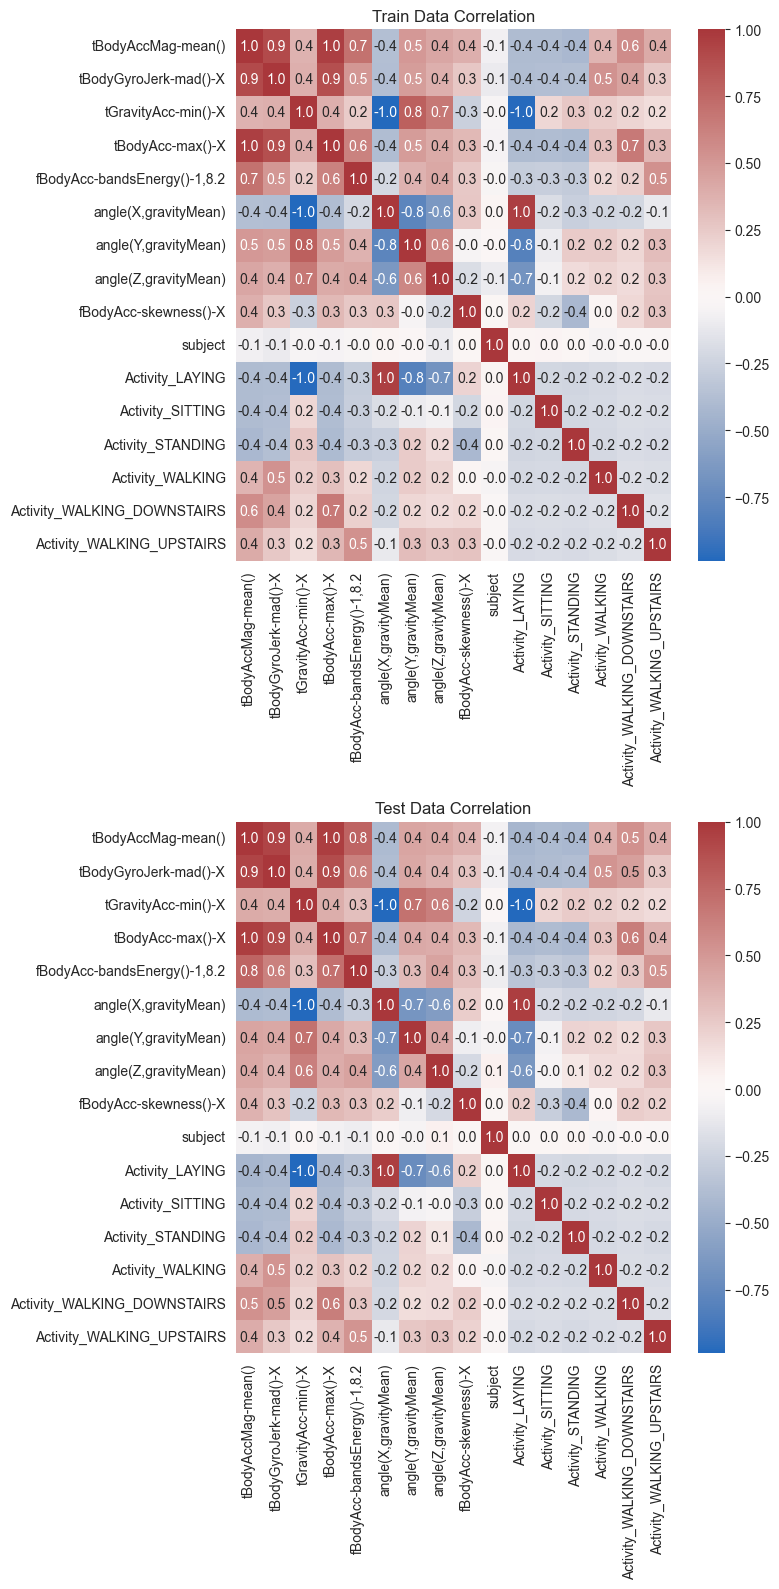

In [212]:
fig, axes = plt.subplots(2, 1, figsize=(8, 16))

train_with_one_hot = pd.get_dummies(train)
# применил one-hot encoding, чтобы найти корреляцию и между категориальными признаками
sns.heatmap(train_with_one_hot.corr(), cmap="vlag", annot=True, fmt="0.1f", ax=axes[0])
axes[0].set_title('Train Data Correlation')
# Не совсем понял что требуется ответить на вопрос "почему так?"
# Но из важных корреляций на тепловой карте можно увидеть,
# что очень легко определить движется человек или нет, так как
# при движении все параметры, кроме tGravityAcc-min()-X, меняются с отрицательной корреляции на положительную.
# Также возможно определить конкретный вид активности/неактивности по определённым критериям
# например, лежание можно точно определить по критерию tGravityAcc-min()-X и трём критериям углов
# стояние можно отличить от сидения по углам y и z (angle(Y,gravityMean) и angle(Z,gravityMean))
# вид движения определить уже сложнее,
# но возможно с этим помогут критерии tBodyAcc-max()-X и fBodyAcc-bandsEnergy()-1,8.2

# Также важно отметить, что большинство признаков коррелирует между собой, что делает
# их менее полезными для определения вида активности, так как они зависят друг от друга
# такая взаимная корреляция может даже запутать модель, поэтому, возможно,
# что можно даже избавиться от некоторых признаков, без вреда для модели

# То же самое верно и для тестовых данных. Значимых отличий в корреляциях между train и test я не заметил

test_with_one_hot = pd.get_dummies(test)
sns.heatmap(test_with_one_hot.corr(), cmap="vlag", annot=True, fmt="0.1f", ax=axes[1])
axes[1].set_title('Test Data Correlation')

plt.tight_layout()
plt.show()

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

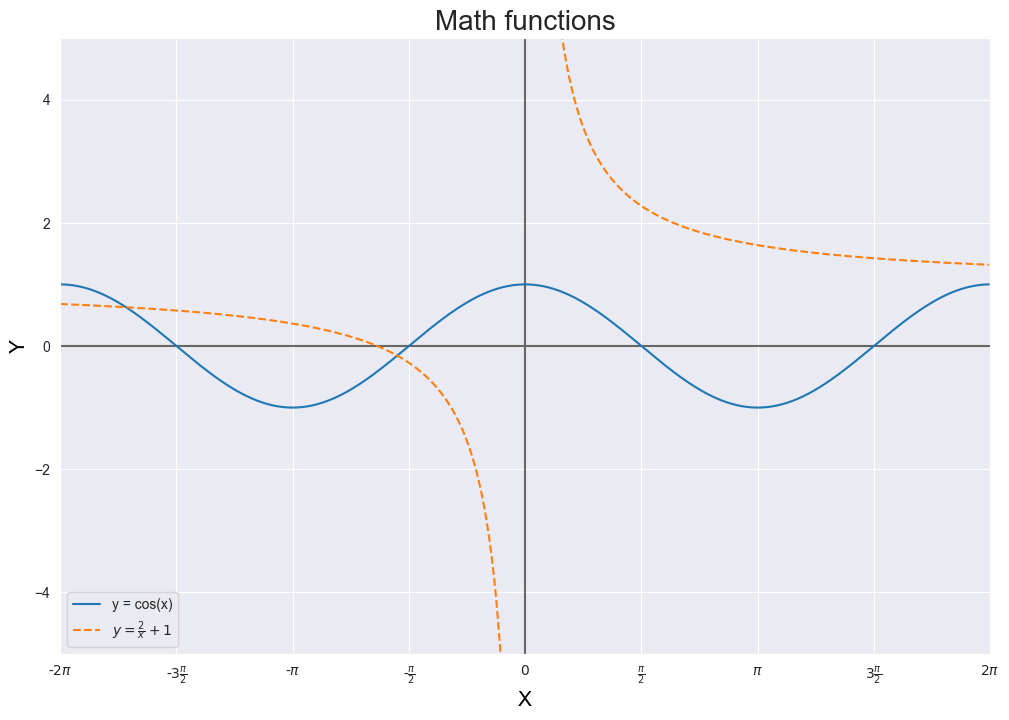

In [213]:
# размер
plt.figure(figsize=(12, 8))

# абсцисса и ордината
ax = plt.gca()
ax.set_ylim([-5, 5])
ax.set_xlim([-360, 360])
plt.axhline(y=0, color='0.4', linestyle='-')
plt.axvline(x=0, color='0.4', linestyle='-')
points = np.array([-2 * np.pi, -3 * np.pi / 2, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
labels = [r'-$2\pi$', r'-$3\frac{\pi}{2}$', r'-$\pi$', r'-$\frac{\pi}{2}$', '$0$', r'$\frac{\pi}{2}$', r'$\pi$',
          r'$3\frac{\pi}{2}$', r'$2\pi$']
plt.xticks(np.rad2deg(points), labels)

# y = cos(x)
x_cos = np.arange(-360, 360)
y_cos = [math.cos(np.deg2rad(i)) for i in x_cos]
plt.plot(x_cos, y_cos, label="y = cos(x)")

# y = 2/x + 1
x_rational = np.arange(-360, 360)
y_rational = [2 / np.deg2rad(i) + 1 for i in x_cos]
plt.plot(x_rational, y_rational, linestyle="--", label=r"$y = \frac{2}{x} + 1$")

# легенда
plt.legend(loc="lower left")

# название
plt.title("Math functions", fontsize=20)

# оси
ax.set_xlabel("X", fontsize=15, color='0')
ax.set_ylabel("Y", fontsize=15, color='0')

plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

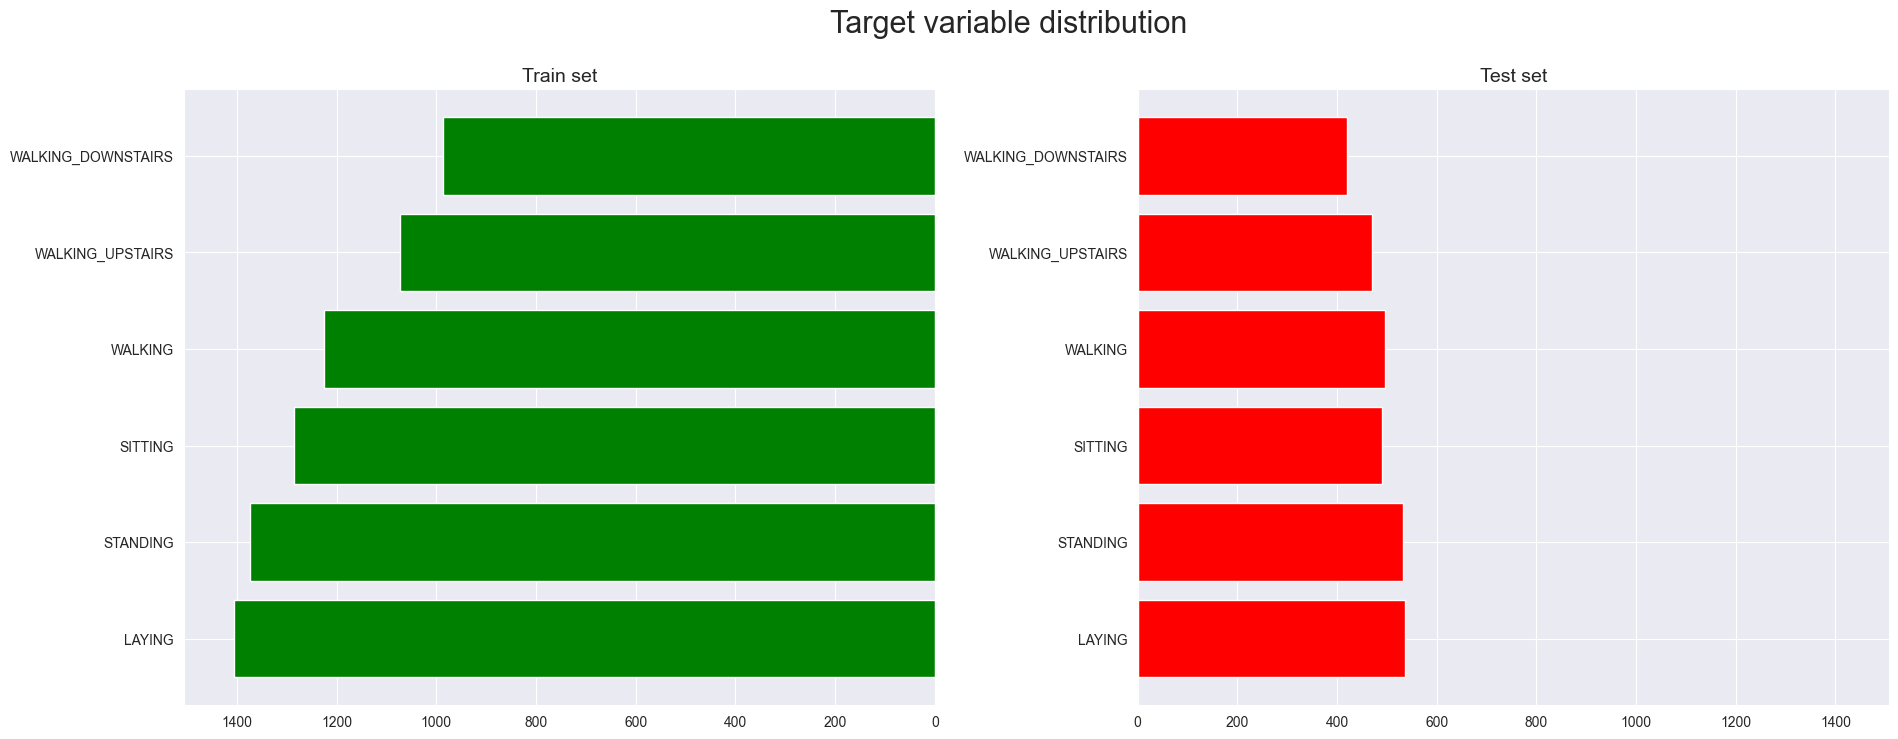

In [214]:
# train_activity_to_amount и test_activity_to_amount взял из задания 3

# получаю ключи train_activity_to_amount, сортированные по значениям
# затем в этом порядке я буду выводить значения в barh
sorted_train_activity_to_amount_keys = list(
    sorted(train_activity_to_amount.keys(), key=lambda x: train_activity_to_amount[x], reverse=True))

_, axes = plt.subplots(1, 2, figsize=(22, 8))

# левый barh
plt.subplot(1, 2, 1)
plt.barh(sorted_train_activity_to_amount_keys,
         list([train_activity_to_amount[i] for i in sorted_train_activity_to_amount_keys]), color='green')
plt.xlim([0, max(train_activity_to_amount.values()) + 100])
plt.gca().invert_xaxis()
plt.title("Train set", fontsize=14)

# правый barh
plt.subplot(1, 2, 2)
plt.barh(sorted_train_activity_to_amount_keys,
         list([test_activity_to_amount[i] for i in sorted_train_activity_to_amount_keys]), color='red')
plt.xlim([0, max(train_activity_to_amount.values()) + 100])
plt.title("Test set", fontsize=14)

plt.subplots_adjust(wspace=0.27)  # Увеличение расстояния между графиками по горизонтали
plt.suptitle("Target variable distribution", fontsize=22)

plt.show()

Правда на таких графиках проще проверять баланс классов таргета?) - да.

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать. 

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

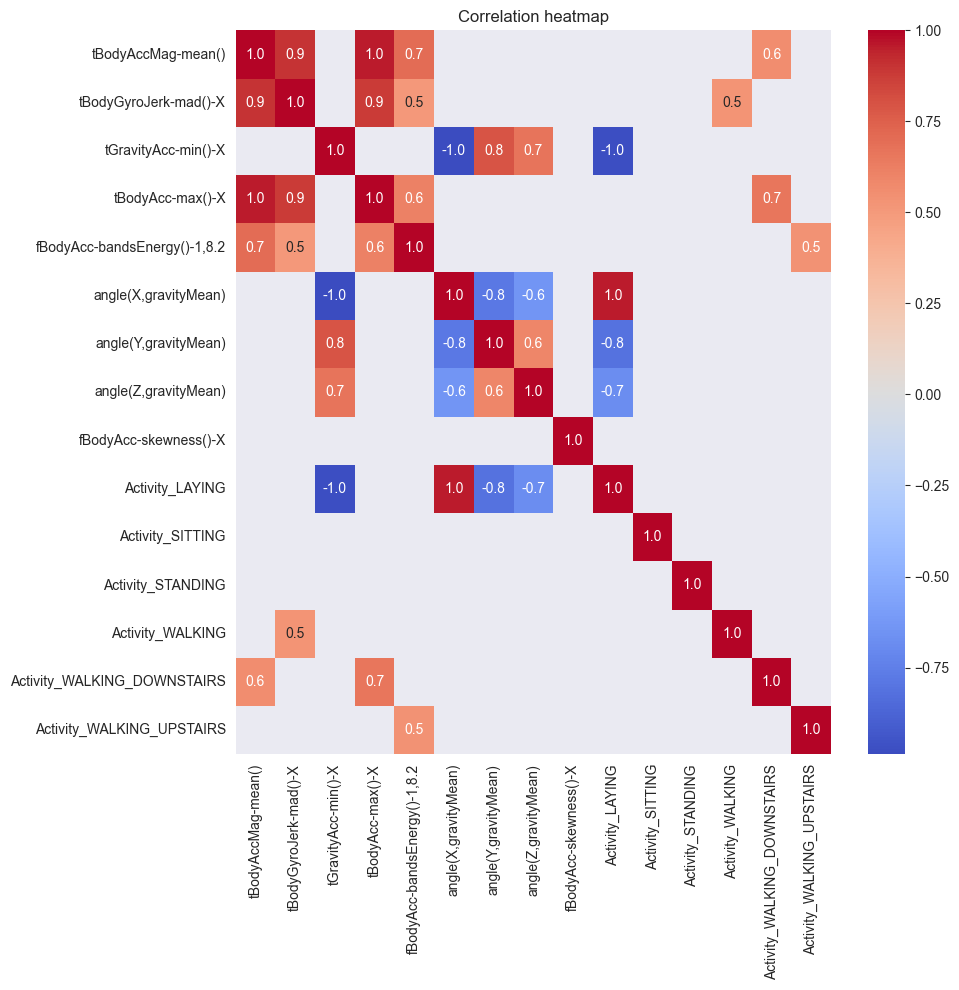

In [215]:
# Буду смотреть корреляцию только у трейна, чтобы не обучать на тесте
# Хоть в примере не рассматривается one-hot целевая переменна, я считаю что её всё равно важно добавить,
# так как корреляции с ней и будут самыми важными на этом хитмапе

# применил one-hot encoding, чтобы найти корреляцию и между категориальными признаками
# (как в задании 4)
train_with_one_hot = pd.get_dummies(train)

# Из рассмотрения корреляции можно и нужно исключить признак subject,
# Так как на самом деле он категориальный признак,
# между которыми можно найти корреляцию если преобразовать с помощью one-hot кодирования
# Но это делать не нужно, так как кроме информации о номере участника исследования
# Он не даёт никакой полезной информации.
# С тем же успехом можно пытаться искать корреляцию индекса замера
# Таким образом я дропаю эту строку
train_with_one_hot_without_subject = train_with_one_hot.drop(columns=["subject"])

# удаляю значения меньше 0.5 по модулю сразу из корреляции, а не из графика
correlation_table = train_with_one_hot_without_subject.corr()
correlation_table = correlation_table[abs(correlation_table) > 0.5]

# непосредственно отрисовка таблицы
_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(correlation_table, cmap="coolwarm", annot=True, fmt="0.1f").set(title='Correlation heatmap')
ax.grid(False)
plt.tight_layout()
plt.show()


### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков. 

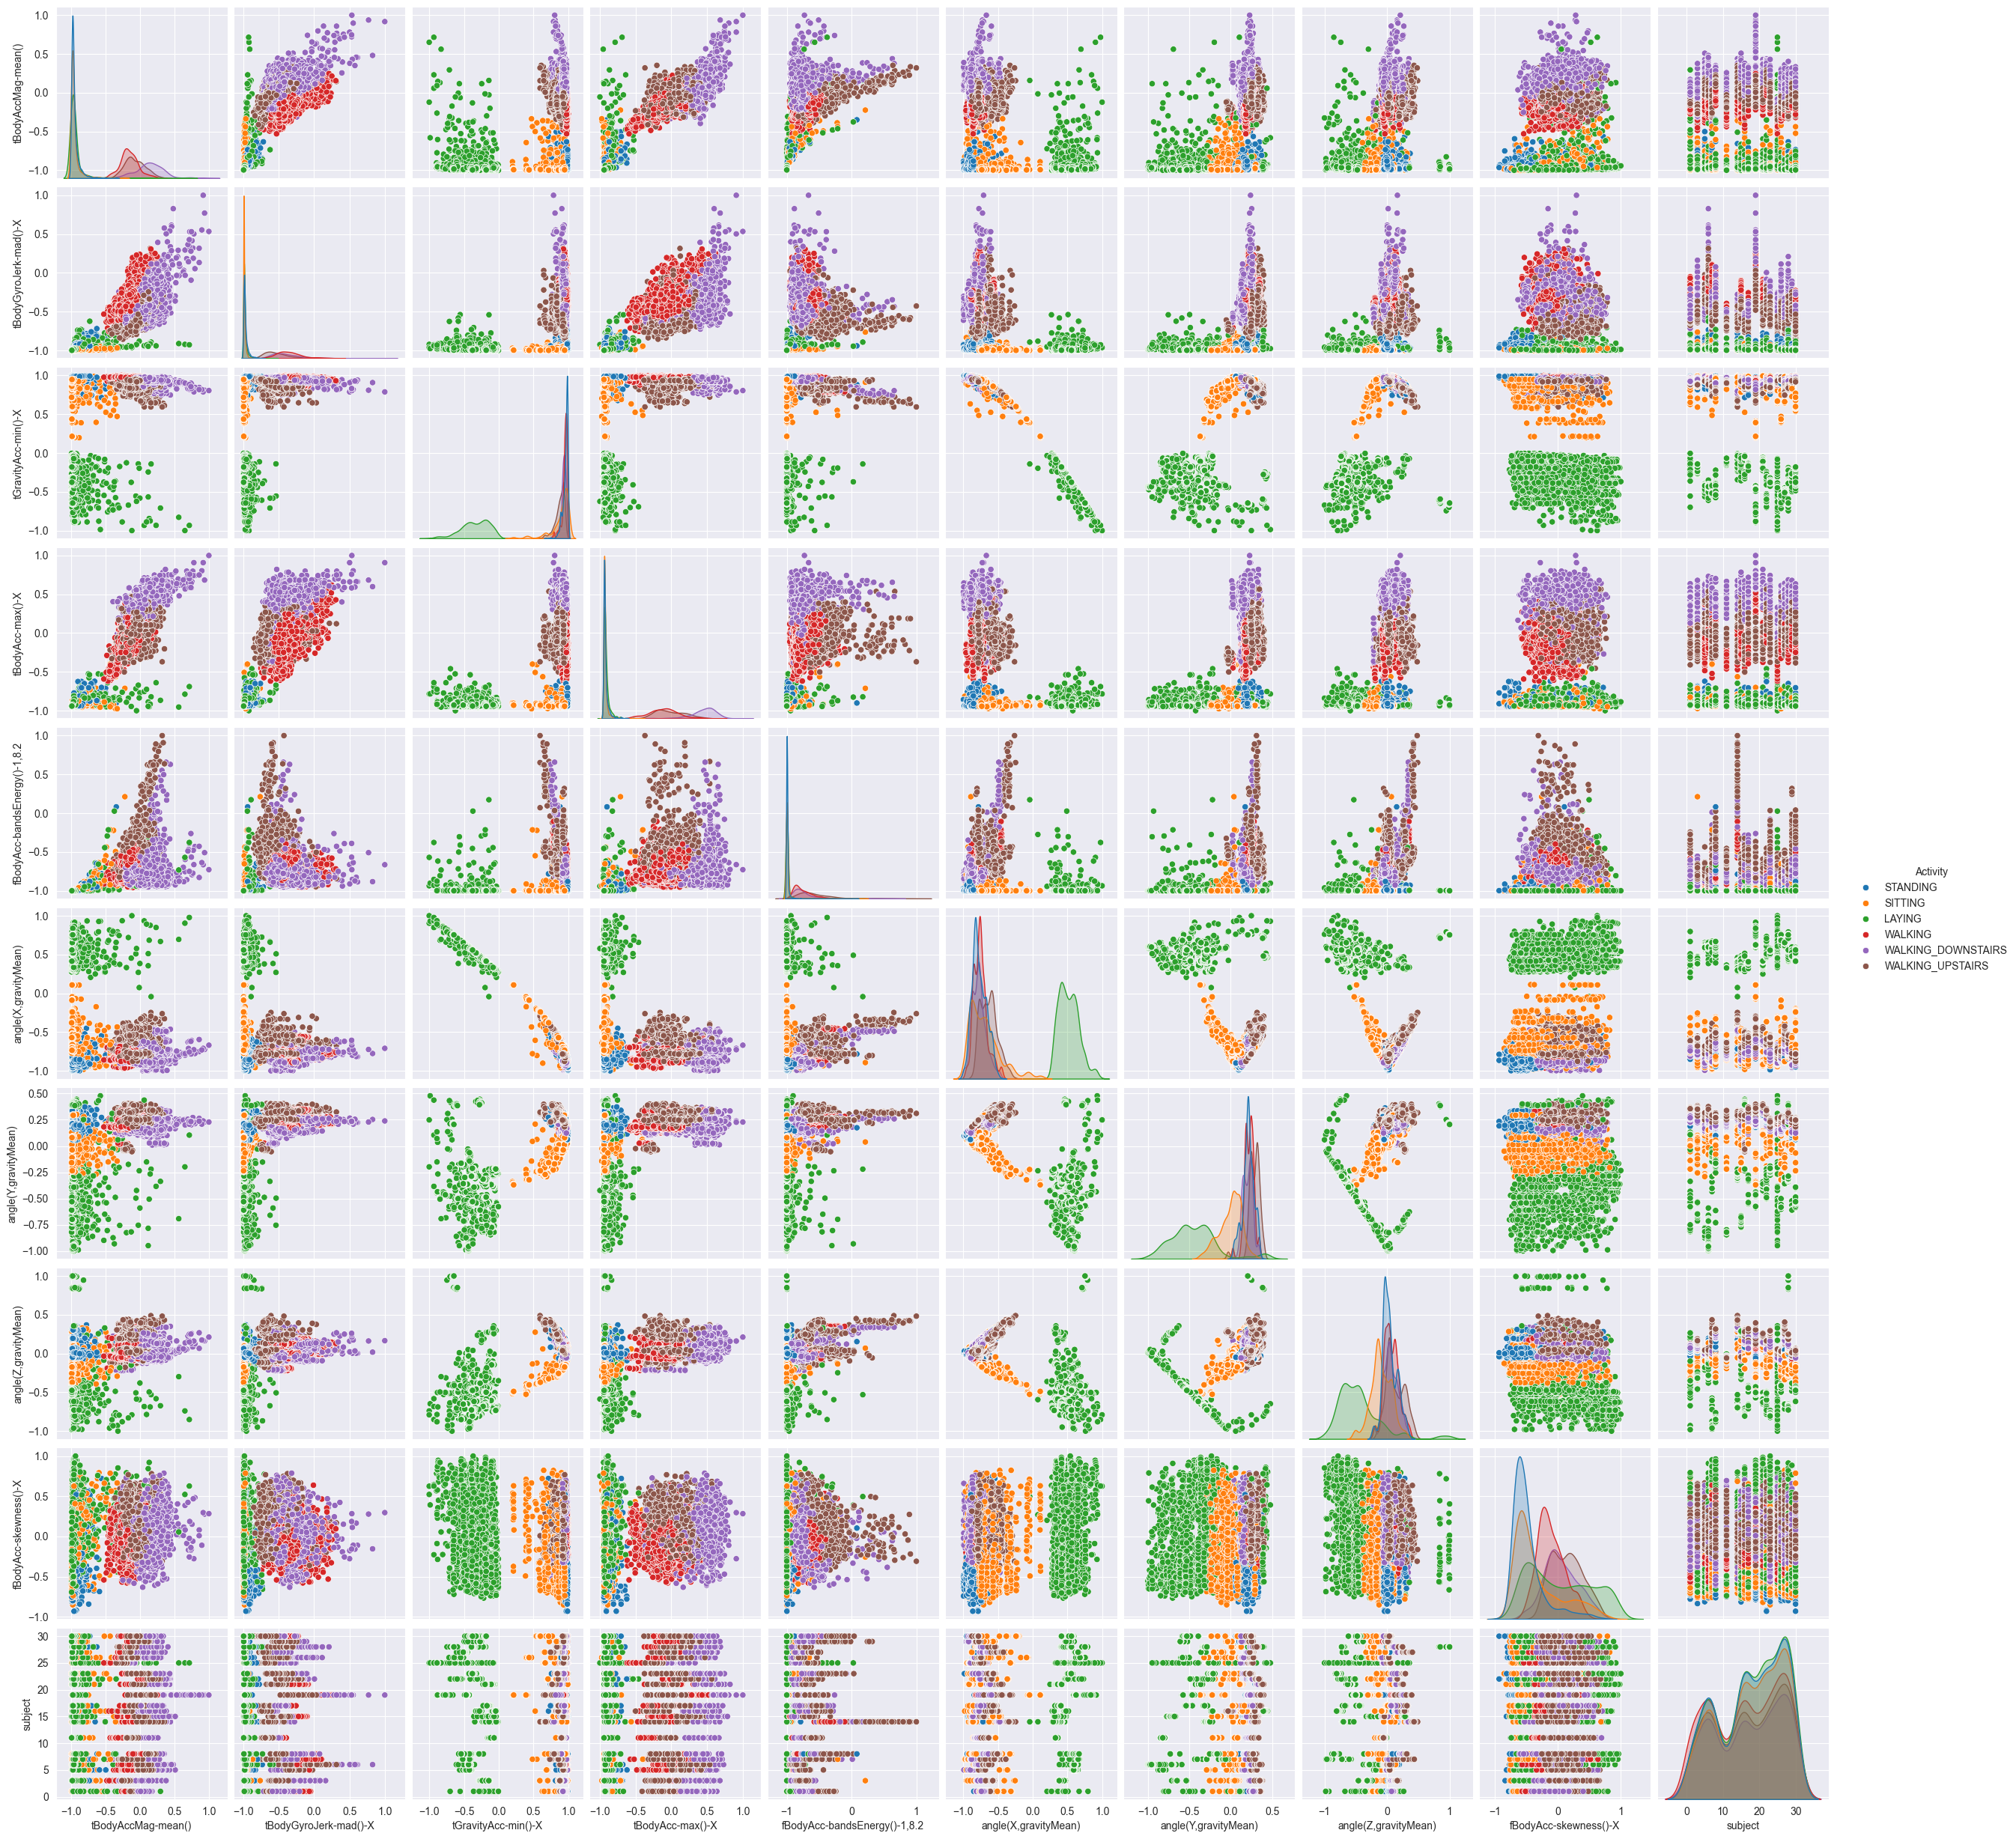

In [216]:
# В данном задании целевую переменную использую в качестве разделения по цвету (hue),
# Чтобы попытаться извлечь какую либо информацию
# Также, аналогично с предыдущим заданием, буду рассматривать только train
# оставлю subject, так как об обратном не сказано

# Из графиков можно увидеть как кучкуются разные виды активности
# Это может помочь при построении модели k ближайших соседей, предсказывающей вид активности по ближайшим точкам
# Анализировать 100 цветных графиков было, конечно, ужасно неудобно

sns.pairplot(train, hue="Activity")

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы. 

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

Доля правильный ответов: 0.9922470076169749


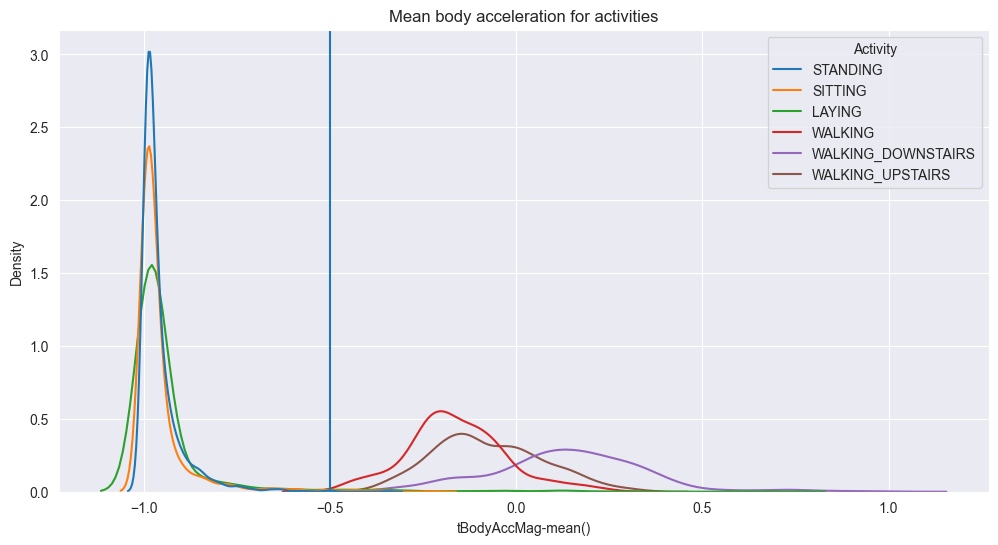

In [217]:
# Проверять гипотезу необходимо на трейне, чтобы не обучаться на тесте
_, ax = plt.subplots(figsize=(12, 6))
# Строю график плотности распределения
sns.kdeplot(x=train["tBodyAccMag-mean()"], hue=train["Activity"], ax=ax, legend=True).set_title(
    "Mean body acceleration for activities")

# На графике очевидна закономерность, что значения, можно разделить на две группы.
# примерно начиная с -0.5 активность можно назвать динамической (ходьба, подъём или спуск с лестницы)
# А ниже -0.5 статические (лежание, сидение, стояние)
# Проведу вертикальную линию на -0.5 (выбрал методом перебора до получения оптимальной точности)

v_line = -0.5  # граница tBodyAccMag-mean() для разделения активностей на статические и динамические
plt.axvline(v_line)

# Теперь найдём правильные ответы (статическая активность меньше -0.5 и динамическая выше -0.5 включительно)

right_answers = train[(
        (train["tBodyAccMag-mean()"] < v_line) & train["Activity"].isin(["STANDING", "SITTING", "LAYING"]) | (
        (train["tBodyAccMag-mean()"] >= v_line) & ~train["Activity"].isin(["STANDING", "SITTING", "LAYING"])))][
    "Activity"]
accuracy = right_answers.count() / train["Activity"].count()
print("Доля правильный ответов:", accuracy)
plt.show()
# Таким образом мы имеем больше 99 процентов точности, что является очень точным предсказанием
# Это можно объяснить тем, что tBodyAccMag-mean() является нормализованным значением, обозначающим

# усреднённую величину ускорения тела испытуемого и при значении ниже -0.5 она будет очень близка к нулю
# При этом очевидно, что нулевое ускорение близкое к нулю обозначает отсутствие движения, что
# и является нашей статической активностью



### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

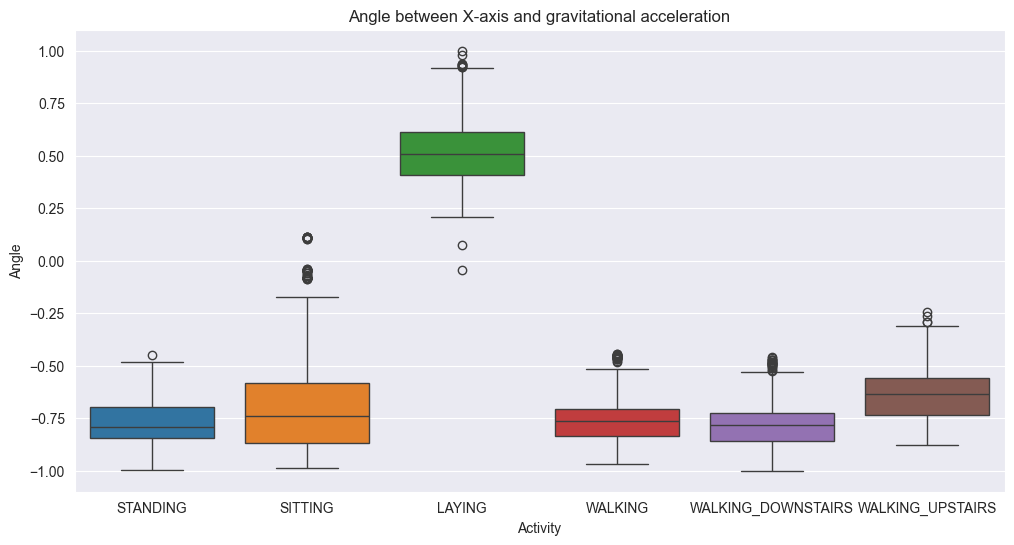

In [218]:
# Проверять гипотезу необходимо на трейне, чтобы не обучаться на тесте

_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(y=train["angle(X,gravityMean)"], x=train["Activity"], ax=ax, palette="tab10").set_title(
    "Angle between X-axis and gravitational acceleration")
ax.set_ylabel("Angle")
plt.show()

# Ещё из корреляции в 4 задании я отмечал, что лежание можно точно определить по
# углу между осью Х и усредненной гравитационной составляющей ускорения.
# Из этой визуализации можно сделать такой же вывод, так как
# Lying очевидно выделяется, и появляется совершенно при другом угле,
# в отличие от остальных видов активности. Лежание разве что
# Можно перепутать с выбросами из сидения.
# Это можно легко объяснить тем, что при лежании человек находится
# в горизонтальной плоскости, а при остальных активностях в вертикальной
# Разве что при сидении человек может сильно откинуться на спинку стула и вызвать выброс,
# Но такой выброс, мне кажется, стоит оставить в данных.

# Выбросы в целом скорее всего вызваны тем, что нельзя точно разграничить
# где человек лежим, полулежит, или сидит. Также сложно чётко разграничить
# когда человек идёт, а когда идёт быстрым шагом или бежит.
# Поэтому, мне кажется выбросы по этому параметру удалять не стоит,
# Чтобы лишний раз не терять информацию.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

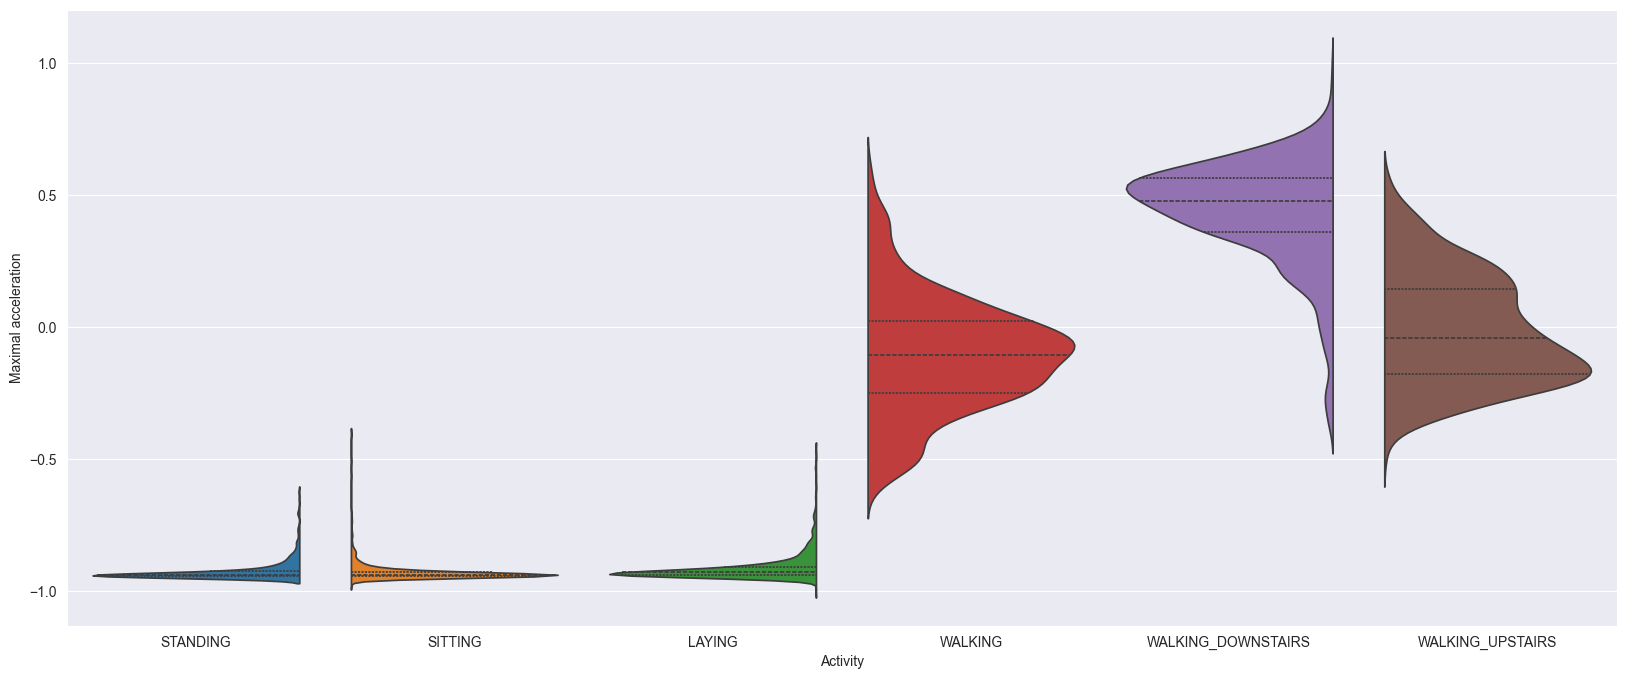

In [219]:
# Проверять гипотезу необходимо на трейне, чтобы не обучаться на тесте

_, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(x=train["Activity"], y=train["tBodyAcc-max()-X"], palette="tab10", split=True, inner='quartile')
ax.set_ylabel("Maximal acceleration")
plt.show()
# На диаграммах можно увидеть, что максимальное ускорение
# Даёт возможность точно разделить активность на статическую и динамическую
# и также может помочь отличить спуск по лестнице от двух других динамических активностей,
# Но почти наверняка одного этого параметра будет недостаточно для гарантированного определения спуска по лестнице
# Это легко объяснить тем, что по лестнице люди обычно спускаются быстрее, чем поднимаются или просто идут.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим. 

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

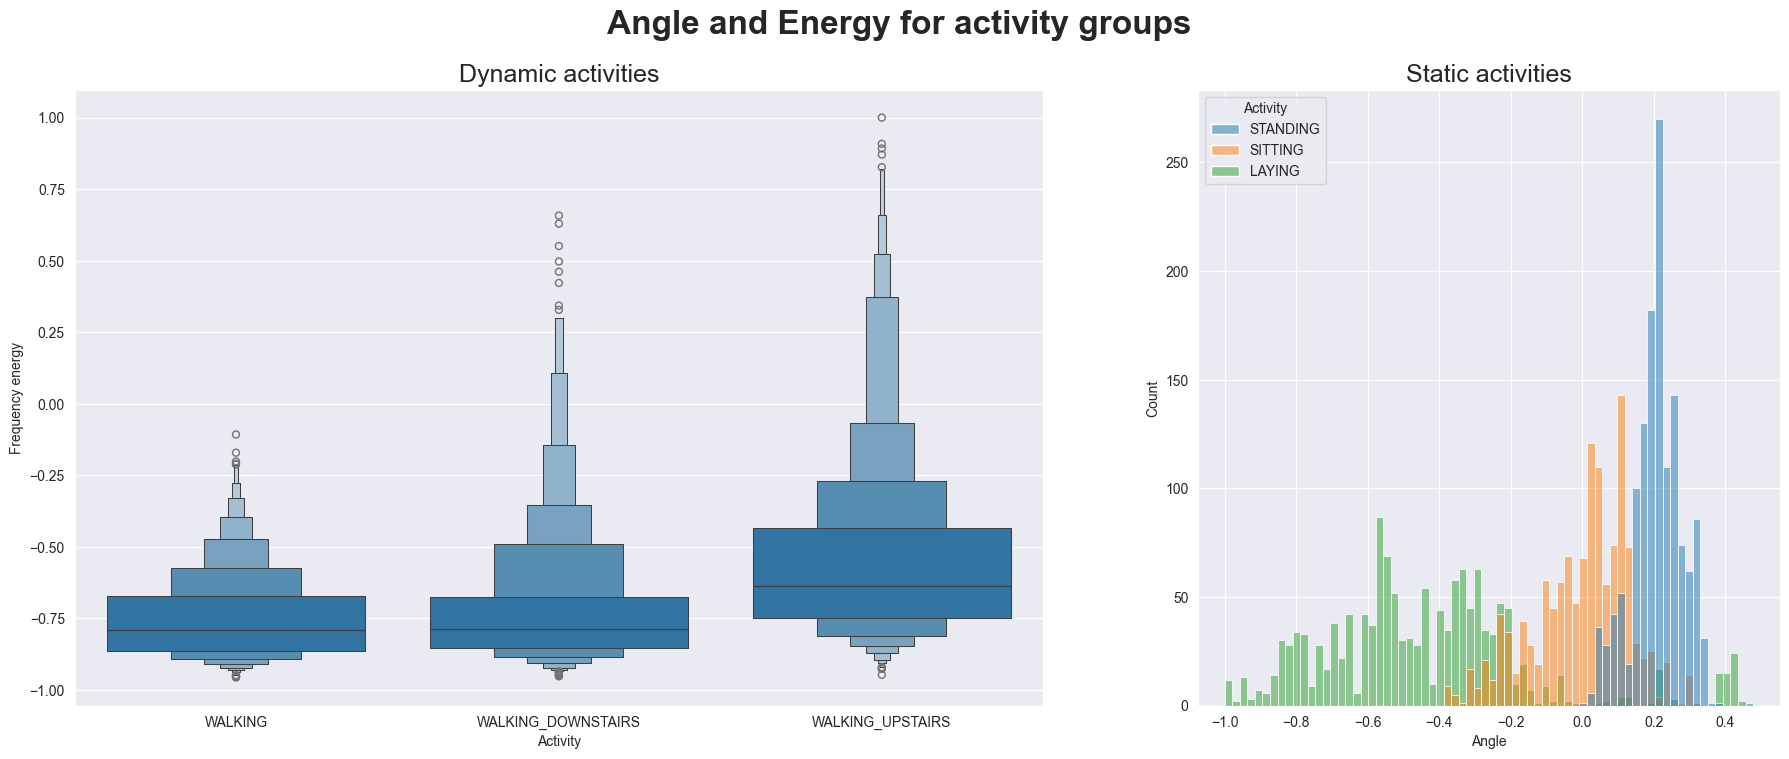

In [220]:
# Делю на две части
train_static = train[train["Activity"].isin(["STANDING", "SITTING", "LAYING"])]
train_dynamic = train[~train["Activity"].isin(["STANDING", "SITTING", "LAYING"])]

_, ax = plt.subplots(1, 2, figsize=(22, 8), width_ratios=[5, 3])
plt.suptitle("Angle and Energy for activity groups", fontsize=24, fontweight='bold')
# ящик с усами для динамичных активностей
sns.boxenplot(x=train_dynamic["Activity"], y=train_dynamic["fBodyAcc-bandsEnergy()-1,8.2"], ax=ax[0]).set_title(
    "Dynamic activities", fontsize=18)
ax[0].set_ylabel("Frequency energy")

# Даёт возможность выдвинуть гипотезу, что энергия ускорения тела в интервале частоты
# выше при подъёме по лестнице, то есть по этому показателю можно отличить то, как человек
# взбирается по лестнице от других динамических активностей. Но не совсем точно, так как
# много пересечений с другими динамическим активностями.
# Но в целом, активность при параметре fBodyAcc-bandsEnergy()-1,8.2 примерно выше -0.7
# можно считать за подъём по лестнице

# гистограмма для статических активностей
sns.histplot(x=train_static["angle(Y,gravityMean)"], hue=train_static["Activity"], ax=ax[1], bins=70).set_title(
    "Static activities", fontsize=18)
ax[1].set_xlabel("Angle")
# Лежание мы научились точно определять в задании 10. Теперь необходимо как-то отделить сидение от стояние
# на этом графике видно, что от угла между осью Y и усредненной гравитационной составляющей ускорения
# можно получить разделение на три варианта статической активности. Но не совсем точно, так как
# много пересечений с другими динамическим активностями.
# Примерно начиная с 0.15 большинство статических активностей будут являться стоянием,
# а ниже 0.15 Сидением. Если считать, что лежание мы определили, и убрали из данных в задании 10
# иначе сидение будет примерно в диапазоне от -0.2 до 0.15

plt.show()

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два! 

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория? 

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

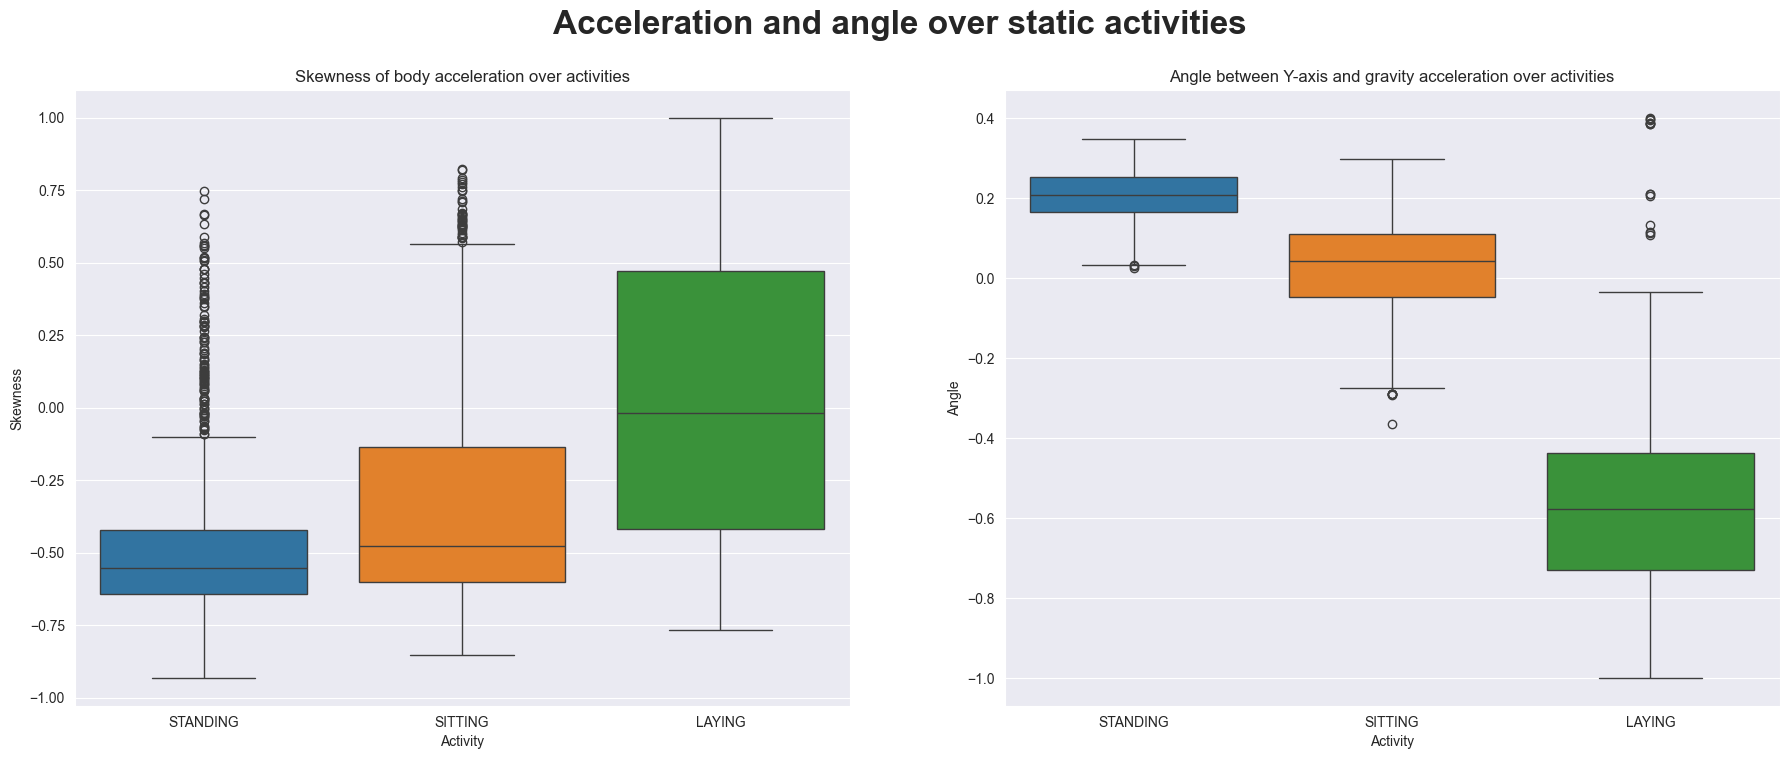

In [221]:
_, ax = plt.subplots(1, 2, figsize=(22, 8), width_ratios=[1, 1])
plt.suptitle("Acceleration and angle over static activities", fontsize=24, fontweight='bold')
sns.boxplot(y=train_static["fBodyAcc-skewness()-X"], x=train_static["Activity"], ax=ax[0], palette="tab10").set_title(
    "Skewness of body acceleration over activities")
ax[0].set_ylabel("Skewness")
sns.boxplot(y="angle(Y,gravityMean)", x="Activity", data=train_static[train_static["fBodyAcc-skewness()-X"] < -0.376],
            ax=ax[1], palette="tab10").set_title("Angle between Y-axis and gravity acceleration over activities")
ax[1].set_ylabel("Angle")

# Вывод из графиков:
# По первому графику видно, что, активность с fBodyAcc-skewness()-X, выше примерно -0.2 почти наверняка будет лежанием
# Аналогично выше значения -0.376 почти наверняка будет лежание. Поэтому, чтобы определить лежание при значениях меньших -0.376
# нам необходим второй параметр angle(Y,gravityMean), который при значениях угла примерно ниже -0.3 позволяет точно определить, что человек лежит
# Таким образом мы можем получить довольно точное предсказание о том, что человек лежим по этим двум параметрам

plt.show()

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет). 

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

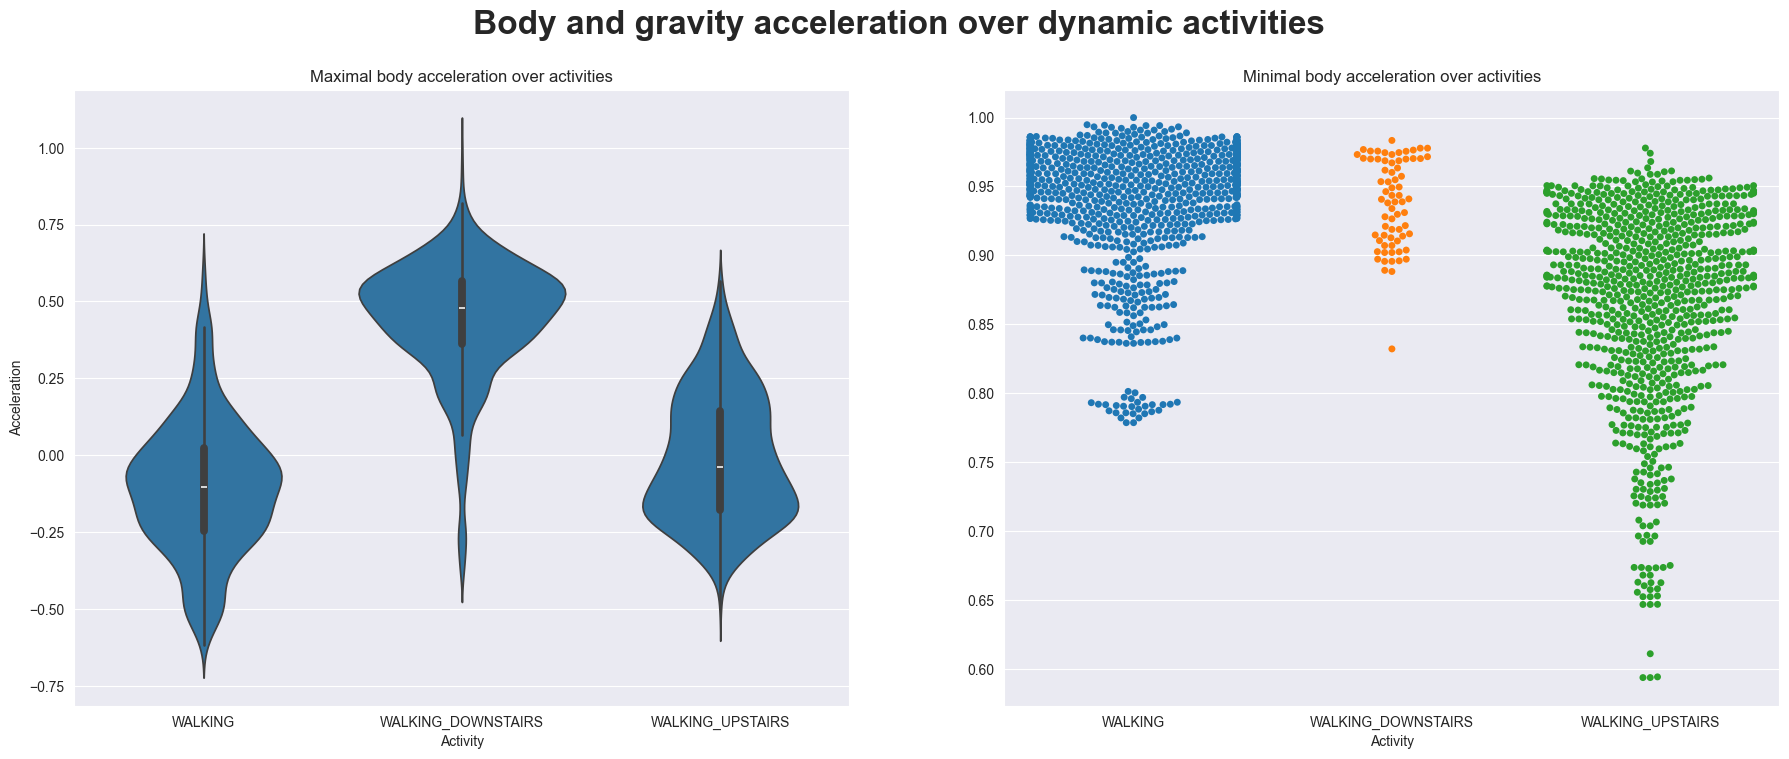

In [222]:
_, ax = plt.subplots(1, 2, figsize=(22, 8), width_ratios=[1, 1])
plt.suptitle("Body and gravity acceleration over dynamic activities", fontsize=24, fontweight='bold')
sns.violinplot(y=train_dynamic["tBodyAcc-max()-X"], x=train_dynamic["Activity"], ax=ax[0]).set_title(
    "Maximal body acceleration over activities")
ax[0].set_ylabel("Acceleration")
sns.swarmplot(y="tGravityAcc-min()-X", x="Activity", data=train_dynamic[train_dynamic["tBodyAcc-max()-X"] < 0.157],
              ax=ax[1], palette="tab10").set_title("Minimal body acceleration over activities")
ax[1].set(ylabel=None)
plt.show()
# Теперь правый график позволяет более точно отличить ходьбу от подъёма по лестнице, чем это было в левом графике

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html). 

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [223]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 7min 39s
Wall time: 1min 20s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [224]:
px.scatter(data_frame=df_2_comp, x="x", y="y", color="Activity")
# Красиво...
# Видно 3 крупных скопления. Очень легко отделить лежания. Можно разделить стояние и сидение линией, но модель будет не совсем точно,
# так как эти два множества пересекаются. Динамические активности сложнее разделить между собой, но это всё равно возможно,
# так как они всё равно группируются по активностям.


Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [225]:
px.scatter_3d(data_frame=df_3_comp, x="x", y="y", z="z", color="Activity")
# Структура есть. Группировка аналогична с двухмерной, но теперь как будто ещё проще разделить на группы без пересечений

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [226]:
def predict(df: pd.DataFrame):
    # начну с разделения данных на статические и динамические (задание 9)
    static_acc_mag_border = -0.49  # граница tBodyAccMag-mean() для разделения активностей на статические и динамические с точностью до 99 процентов
    static_df = df[df["tBodyAccMag-mean()"] < static_acc_mag_border]
    dynamic_df = df[df["tBodyAccMag-mean()"] >= static_acc_mag_border]

    # Теперь определим Лежание по angle(X,gravityMean) (задание 10)
    # Буду за лежания брать значения выше 0 (из графика)
    lying_x_angle_border = 0
    lying = static_df[static_df["angle(X,gravityMean)"] > lying_x_angle_border]
    static_without_lying = static_df[static_df["angle(X,gravityMean)"] <= lying_x_angle_border]

    # Теперь определю спуск по лестнице по tBodyAcc-max()-X (задание 11 и 14)
    # Буду за спуск по лестнице брать значения выше 0.25 (из графика)
    downstairs_acc_max_border = 0.25
    walking_downstairs = dynamic_df[dynamic_df["tBodyAcc-max()-X"] >= downstairs_acc_max_border]
    # и отделю значения без спуска по лестнице
    dynamic_df_without_downstairs = dynamic_df[dynamic_df["tBodyAcc-max()-X"] < downstairs_acc_max_border]

    # Теперь отделим подъём по лестнице от ходьбы с помощью параметра tGravityAcc-min()-X
    # Из второго графика в задании 14 видно, что их можно поделить по значению 0.95
    # где ниже этой границы будет подъём по лестнице, а выше - ходьба
    walking_band_energy_border = 0.95
    walking_upstairs = dynamic_df_without_downstairs[
        dynamic_df_without_downstairs["tGravityAcc-min()-X"] < walking_band_energy_border]
    walking = dynamic_df_without_downstairs[
        dynamic_df_without_downstairs["tGravityAcc-min()-X"] >= walking_band_energy_border]

    # Теперь осталось отделить сидение от стояния. Что их разделить воспользуемся angle(Y,gravityMean)
    # Из второго графика в задании 12 видно, что примерно с 0.14 человек стоит, а ниже - сидит (с учётом того, что лежание мы уже удалили)
    standing_angle_y_border = 0.14
    standing = static_without_lying[static_without_lying["angle(Y,gravityMean)"] >= standing_angle_y_border]
    sitting = static_without_lying[static_without_lying["angle(Y,gravityMean)"] < standing_angle_y_border]

    # В результате у нас есть датафрейм, содержащий прогноз для каждого измерения. Преобразуем эти датафреймы в вектор предсказаний
    # Для этого я пройдусь циклом по изначальным данным, и тот прогноз, с каким совпадёт индекс строки, я добавлю в вектор
    prediction = []
    for index in df.index:
        if index in standing.index:
            prediction.append("STANDING")
        elif index in sitting.index:
            prediction.append("SITTING")
        elif index in lying.index:
            prediction.append("LAYING")
        elif index in walking.index:
            prediction.append("WALKING")
        elif index in walking_downstairs.index:
            prediction.append("WALKING_DOWNSTAIRS")
        elif index in walking_upstairs.index:
            prediction.append("WALKING_UPSTAIRS")
    return prediction


def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [227]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8339227421109902
Accuracy on test set => 0.7831693247370207


__Место для мема и/или фидбэка__